In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
data = pd.read_csv('Foodpanda Analysis Dataset.csv')
data.head(1)

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,8/23/2023,McDonald's,Burger,Italian,5,1478.27,Cash,38,7/19/2025,238,Active,3,10/14/2024,Cancelled


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      6000 non-null   object 
 1   gender           6000 non-null   object 
 2   age              6000 non-null   object 
 3   city             6000 non-null   object 
 4   signup_date      6000 non-null   object 
 5   order_id         6000 non-null   object 
 6   order_date       6000 non-null   object 
 7   restaurant_name  6000 non-null   object 
 8   dish_name        6000 non-null   object 
 9   category         6000 non-null   object 
 10  quantity         6000 non-null   int64  
 11  price            6000 non-null   float64
 12  payment_method   6000 non-null   object 
 13  order_frequency  6000 non-null   int64  
 14  last_order_date  6000 non-null   object 
 15  loyalty_points   6000 non-null   int64  
 16  churned          6000 non-null   object 
 17  rating        

In [7]:
data.describe()

,quantity,price,order_frequency,loyalty_points,rating
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2.991667,800.524880,25.304667,250.173667,2.996833
std,1.414778,404.855029,14.358930,144.608478,1.406113
min,1.000000,100.300000,1.000000,0.000000,1.000000
25%,2.000000,441.997500,13.000000,125.000000,2.000000
50%,3.000000,806.460000,25.000000,249.500000,3.000000
75%,4.000000,1149.737500,37.000000,378.000000,4.000000
max,5.000000,1499.950000,50.000000,500.000000,5.000000


In [8]:
data.isna().sum()

customer_id        0
gender             0
age                0
city               0
signup_date        0
order_id           0
order_date         0
restaurant_name    0
dish_name          0
category           0
quantity           0
price              0
payment_method     0
order_frequency    0
last_order_date    0
loyalty_points     0
churned            0
rating             0
rating_date        0
delivery_status    0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.dtypes

customer_id         object
gender              object
age                 object
city                object
signup_date         object
order_id            object
order_date          object
restaurant_name     object
dish_name           object
category            object
quantity             int64
price              float64
payment_method      object
order_frequency      int64
last_order_date     object
loyalty_points       int64
churned             object
rating               int64
rating_date         object
delivery_status     object
dtype: object

In [11]:
data['signup_date'] = pd.to_datetime(data['signup_date'])
data['order_date'] = pd.to_datetime(data['order_date'])
data['last_order_date'] = pd.to_datetime(data['last_order_date'])
data['rating_date'] = pd.to_datetime(data['rating_date'])

In [12]:
data.dtypes

customer_id                object
gender                     object
age                        object
city                       object
signup_date        datetime64[ns]
order_id                   object
order_date         datetime64[ns]
restaurant_name            object
dish_name                  object
category                   object
quantity                    int64
price                     float64
payment_method             object
order_frequency             int64
last_order_date    datetime64[ns]
loyalty_points              int64
churned                    object
rating                      int64
rating_date        datetime64[ns]
delivery_status            object
dtype: object

In [13]:
data.head(3)

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,Adult,Peshawar,2024-01-14,O9663,2023-08-23,McDonald's,Burger,Italian,5,1478.27,Cash,38,2025-07-19,238,Active,3,2024-10-14,Cancelled
1,C2831,Male,Adult,Multan,2024-07-07,O6831,2023-08-23,KFC,Burger,Italian,3,956.04,Wallet,24,2024-11-25,81,Active,2,2025-08-21,Delayed
2,C2851,Other,Senior,Multan,2025-06-20,O6851,2023-08-23,Pizza Hut,Fries,Italian,2,882.51,Cash,42,2025-05-10,82,Inactive,3,2024-09-19,Delayed


# EXPLORATORY DATA ANALYSIS :

# 1. Customer Insights

In [16]:
# Q1 : Active vs. Churned Customers → % of customers who stopped ordering (churn analysis).

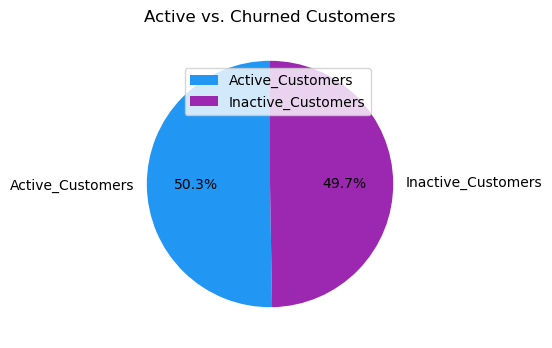

In [17]:
churn_summary = data['churned'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(
    churn_summary,
     labels=['Active_Customers', 'Inactive_Customers'],   # Active / Inactive
    autopct='%1.1f%%',
    startangle=90,
    colors=['#2196F3','#9C27B0']  # Green = Active, Red = Churned
)
plt.legend(loc=6,bbox_to_anchor=(0.2, 0.8),ncols=1)
plt.title("Active vs. Churned Customers")
plt.show()

In [19]:
#For This We Should Convert The Active : 1 , Inactive : 0 .
data['churned_flags'] = data['churned'].map({'Active':1,'Inactive':0})

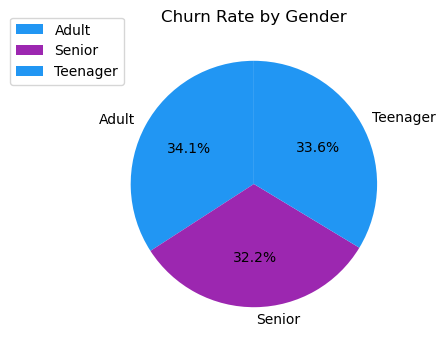

In [20]:
churned_data = data.groupby(['age'])['churned_flags'].mean()*100  #percentage.
plt.figure(figsize=(4,4))
plt.pie(
    churned_data,
    labels=churned_data.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#2196F3','#9C27B0']
)
plt.legend(loc=4,bbox_to_anchor=(0.1, 0.8),ncols=1)
plt.title("Churn Rate by Gender")
plt.show()

HERE MAX USER FROM ADULT SIDE , THEN TEENAGERS , AND THEN SENIORS.

# AGE DISTRIBUTION :

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11700\2484427111.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data,x='age', kde=True,palette=['red','#2196F3','#9C27B0'],label = 'Ages Distribution')


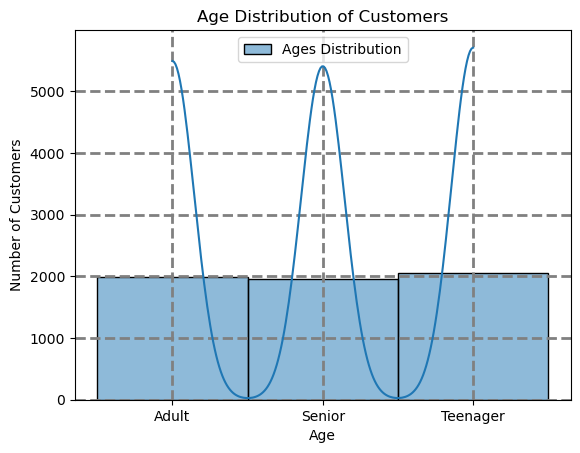

In [23]:
sns.histplot(data=data,x='age', kde=True,palette=['red','#2196F3','#9C27B0'],label = 'Ages Distribution')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.legend()
plt.grid(True,linestyle='--',linewidth=2,color='gray')
plt.show()

# GENDER DISTRIBUTION :

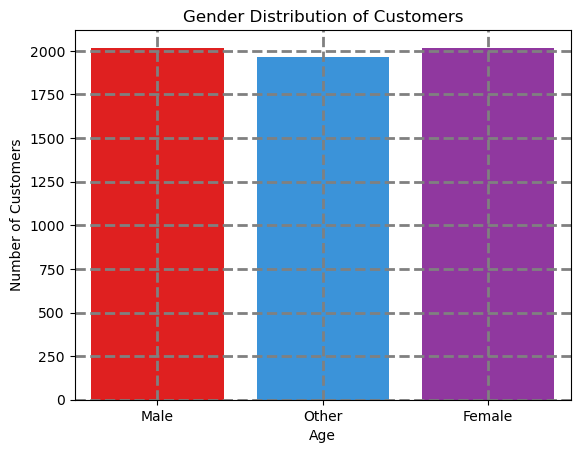

In [25]:
sns.countplot(data=data,x='gender',palette=['red','#2196F3','#9C27B0'],orient="v",hue='gender')
plt.title("Gender Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.grid(True,linestyle='--',linewidth=2,color='gray')
plt.show()

HERE IN GENDER DISRIBUTION THE MAX CUSTOMERS FROM MALE SIDE.

# TOP 10 CITY DISTRIBUTION

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11700\2398846320.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=top_10.index,y=top_10.values,palette='viridus', marker='o',label=top_10)


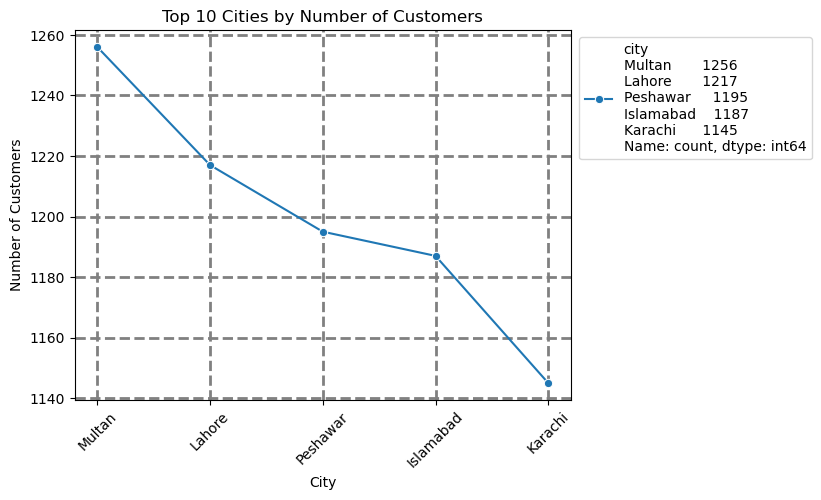

In [28]:
top_10 = data['city'].value_counts().head(10)
sns.lineplot(x=top_10.index,y=top_10.values,palette='viridus', marker='o',label=top_10)
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1))
plt.grid(True,linestyle='--',linewidth=2,color='gray')
plt.title("Top 10 Cities by Number of Customers")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.show()

MAX CUSTOMERS FROM MULTAN SIDE .

In [30]:
# Here we make a repeat oreder col :
repeat_orders = data.groupby('customer_id')['order_id'].nunique().reset_index()
repeat_orders.columns = ['customer_id', 'repeat_orders']

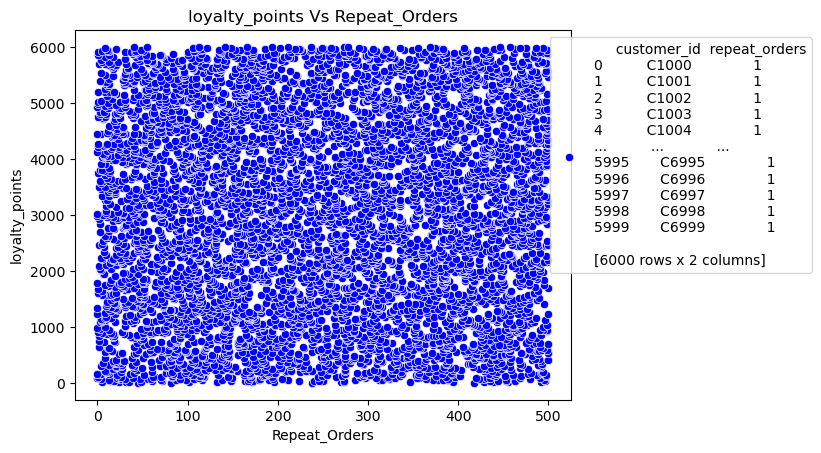

In [31]:
sns.scatterplot(data,x='loyalty_points',y=repeat_orders.index,color='blue',label=repeat_orders)
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1))
plt.title('loyalty_points Vs Repeat_Orders')
plt.ylabel('loyalty_points')
plt.xlabel('Repeat_Orders')
plt.show()

In [32]:
# Find Each Customer’s First Order Date
first_orders = data.groupby('customer_id')['order_date'].min().reset_index()
first_orders.columns = ['customer_id', 'first_order_date']

In [33]:
# Merge with Signup Date
signup_gap = data[['customer_id','signup_date']].drop_duplicates()
signup_gap = signup_gap.merge(first_orders, on='customer_id', how='left')

In [34]:
# Calculate Gap in Days
signup_gap['days_to_first_order'] = (signup_gap['first_order_date'] - signup_gap['signup_date']).dt.days

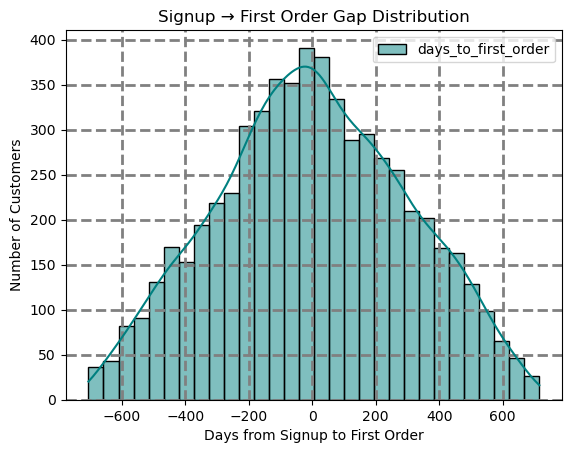

In [35]:
sns.histplot(signup_gap['days_to_first_order'].dropna(), bins=30, kde=True, color='teal',label='days_to_first_order')
plt.legend(loc='upper right',bbox_to_anchor=(1,1))
plt.grid(True,linestyle='--',linewidth=2,color='gray')
plt.title("Signup → First Order Gap Distribution")
plt.xlabel("Days from Signup to First Order")
plt.ylabel("Number of Customers")
plt.show()

# 2. Order & Food Insights

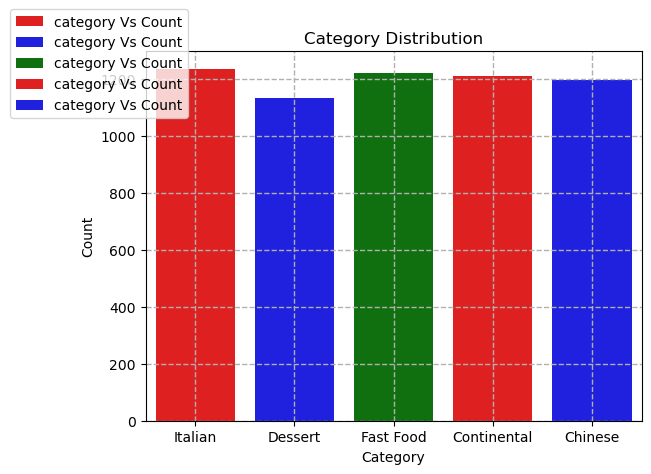

In [37]:
ax = sns.countplot(data=data,x='category',hue='category',palette=['red', 'blue', 'green', 'red', 'blue'],label='category Vs Count',orient='v')
ax.grid(True, linestyle='--', alpha=1,linewidth=1)
plt.legend(loc=4,bbox_to_anchor=(0.1, 0.8),ncols=1)
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

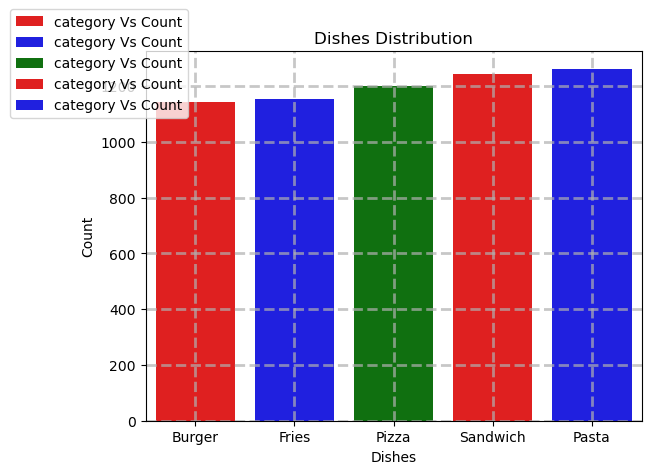

In [38]:
ax = sns.countplot(data=data,x='dish_name',hue='dish_name',palette=['red', 'blue', 'green', 'red', 'blue'],label='category Vs Count')
ax.grid(True, linestyle='--', alpha=0.7,linewidth=2)
plt.legend(loc=4,bbox_to_anchor=(0.1, 0.8),ncols=1)
plt.title("Dishes Distribution")
plt.xlabel("Dishes")
plt.ylabel("Count")
plt.show()

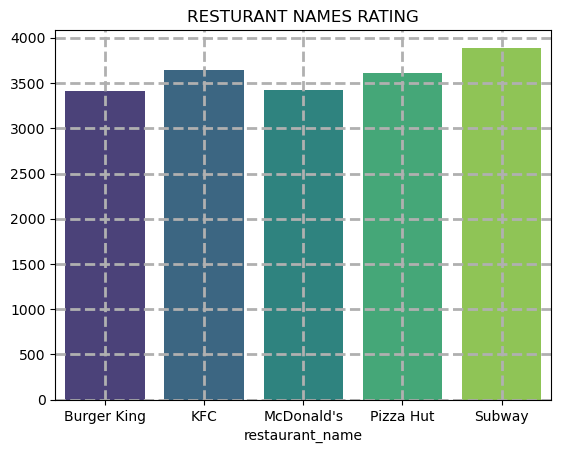

In [39]:
per_rating =data.groupby('restaurant_name')['rating'].sum()
sns.barplot(x=per_rating.index, y=per_rating.values, palette="viridis",hue=per_rating.index)
plt.title('RESTURANT NAMES RATING')
plt.grid(True,linestyle='--',linewidth=2)
plt.show()

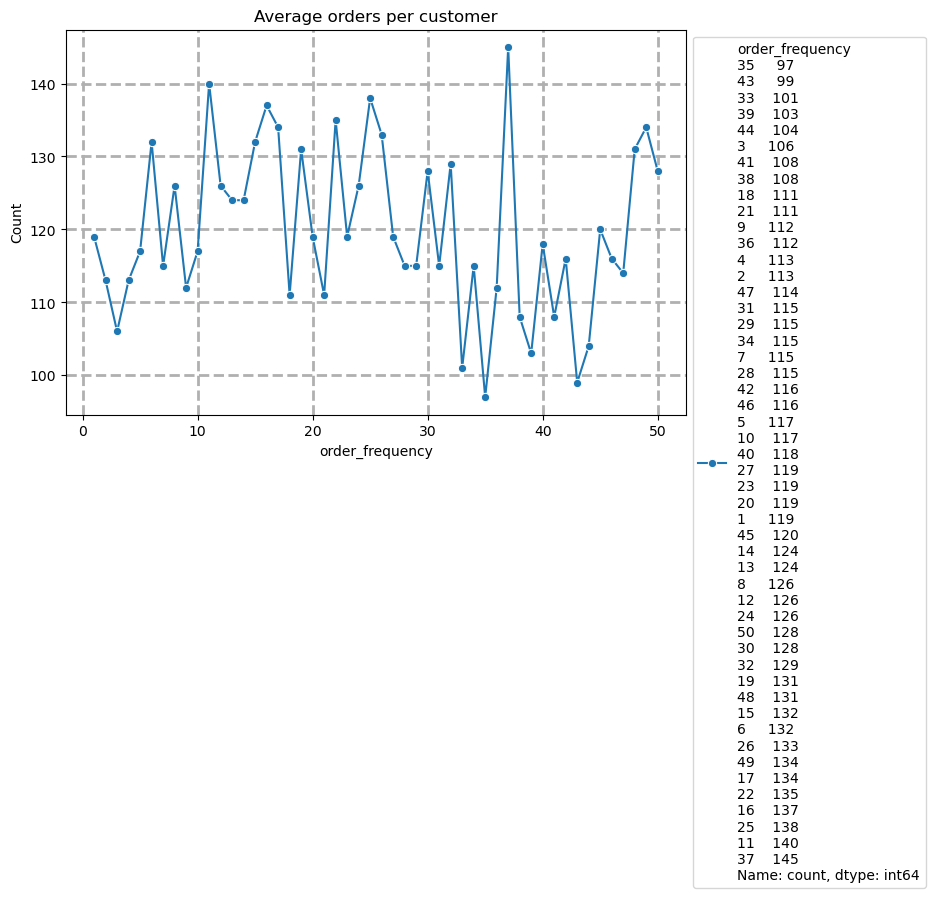

In [40]:
avg_order_freq = data['order_frequency'].value_counts().sort_values()
plt.figure(figsize=(8,5))
sns.lineplot(x=avg_order_freq.index,y=avg_order_freq.values,marker='o',label=avg_order_freq)
plt.title('Average orders per customer')
plt.legend(bbox_to_anchor=(1,1),ncols=0)
plt.ylabel('Count')
plt.grid(True,linestyle='--',linewidth=2)
plt.show()

In [41]:
# Group by city to calculate AOV and Revenue
price_trends = data.groupby('city').agg(
    Revenue=('price', 'sum'),
    Orders=('order_id', 'nunique')  # count unique orders
).reset_index()

# Calculate AOV
price_trends['AOV'] = price_trends['Revenue'] / price_trends['Orders']

D:\Anaconda\envs\pyfix\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


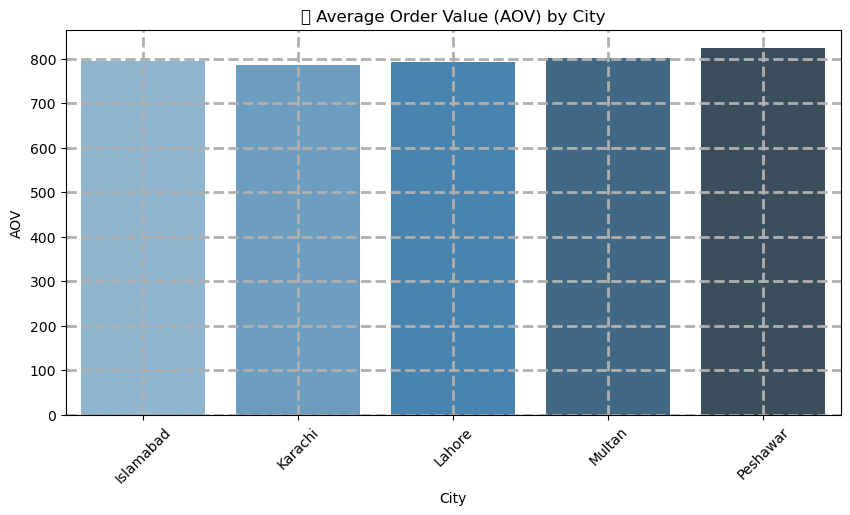

D:\Anaconda\envs\pyfix\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


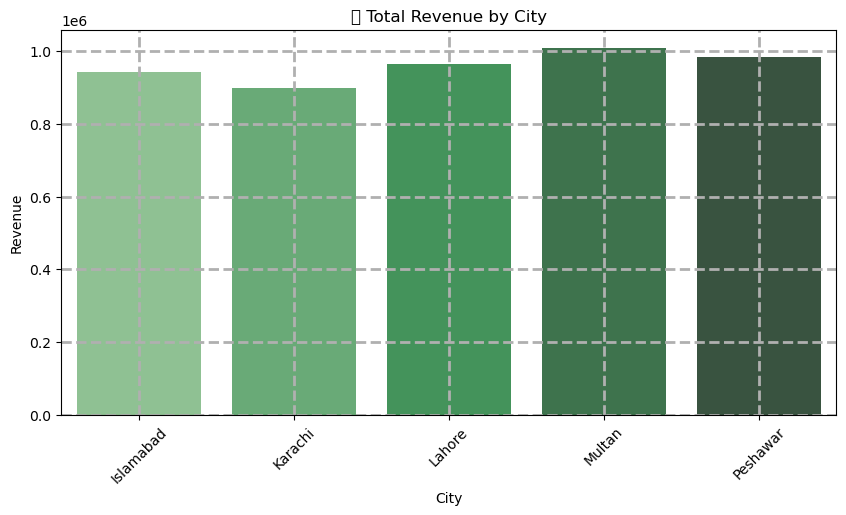

In [42]:
# --- Plot Average Order Value (AOV) by City ---
plt.figure(figsize=(10,5))
sns.barplot(data=price_trends, x='city', y='AOV', palette="Blues_d",hue='city',legend=False)
plt.title("🏙️ Average Order Value (AOV) by City")
plt.grid(True,linestyle='--',linewidth=2)
plt.ylabel("AOV")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.show()

# --- Plot Revenue by City ---
plt.figure(figsize=(10,5))
sns.barplot(data=price_trends, x='city', y='Revenue', palette="Greens_d",legend=False,hue='city')
plt.grid(True,linestyle='--',linewidth=2)
plt.title("💰 Total Revenue by City")
plt.ylabel("Revenue")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.show()

# 3. Payment & Revenue Insights

D:\Anaconda\envs\pyfix\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


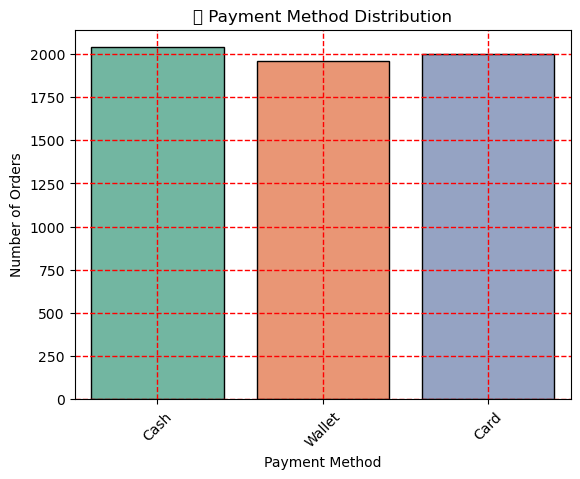

In [44]:
sns.countplot(data=data, x='payment_method', palette="Set2", edgecolor="black",hue='payment_method',legend=False)
plt.title("💳 Payment Method Distribution")
plt.grid(True,linestyle='--',linewidth=1,color='red')
plt.xlabel("Payment Method")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


In [45]:
total_rev = data['price'].sum()
total_rev

4803149.279999999

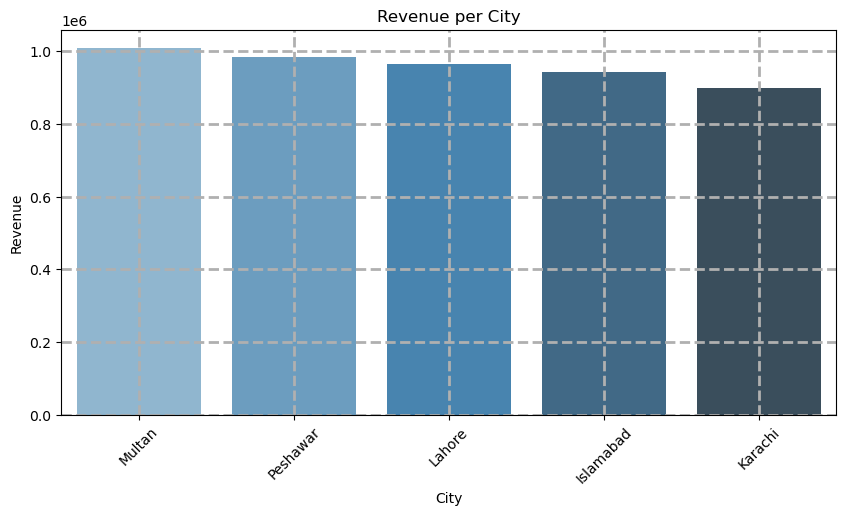

In [46]:
rev_per_city = data.groupby('city')['price'].sum().reset_index().sort_values(by='price',ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(data=rev_per_city, x='city', y='price', palette="Blues_d",hue='city')
plt.grid(True,linestyle='--',linewidth=2)
plt.title("Revenue per City")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

D:\Anaconda\envs\pyfix\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


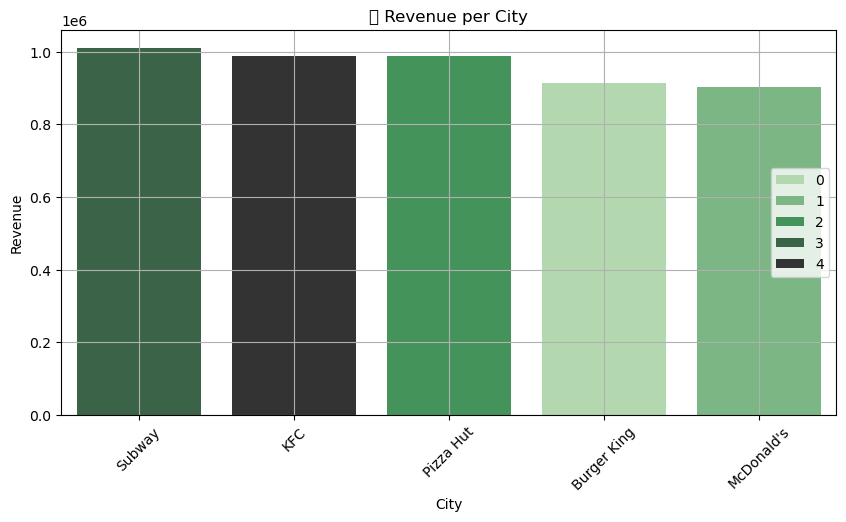

In [47]:
rev_per_res = data.groupby('restaurant_name')['price'].sum().reset_index().sort_values(by='price',ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(data=rev_per_res, x='restaurant_name', y='price', palette="Greens_d",hue=rev_per_city.index)
plt.legend(loc=7)
plt.grid(True)
plt.title("🏙️ Revenue per City")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

Q4 : High-Value Customers → Customers with high lifetime value (AOV × order frequency).

In [49]:
# Step 1: Calculate revenue per customer
customer_revenue = data.groupby('customer_id').agg(
    Total_Spend=('price', 'sum'),
    Orders=('order_id', 'nunique')
).reset_index()

print(customer_revenue)
# Step 2: Calculate AOV per customer
customer_revenue['AOV'] = customer_revenue['Total_Spend'] / customer_revenue['Orders']

# Step 3: Calculate Customer Lifetime Value (CLV)
customer_revenue['CLV'] = customer_revenue['AOV'] * customer_revenue['Orders']

High_Value_Customers = customer_revenue.sort_values(by='CLV', ascending=False).head(10)


     customer_id  Total_Spend  Orders
0          C1000      1210.10       1
1          C1001       322.72       1
2          C1002      1452.54       1
3          C1003       133.44       1
4          C1004      1044.89       1
...          ...          ...     ...
5995       C6995       655.00       1
5996       C6996      1117.04       1
5997       C6997       335.64       1
5998       C6998       571.39       1
5999       C6999      1033.59       1

[6000 rows x 3 columns]


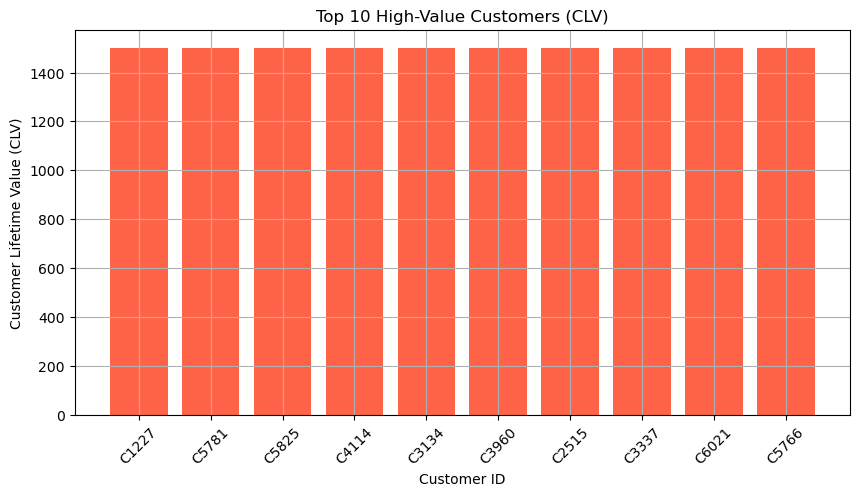

In [50]:
plt.figure(figsize=(10,5))
plt.bar(High_Value_Customers['customer_id'], High_Value_Customers['CLV'], color="tomato")
plt.grid(True)
plt.title("Top 10 High-Value Customers (CLV)")
plt.xlabel("Customer ID")
plt.ylabel("Customer Lifetime Value (CLV)")
plt.xticks(rotation=45)
plt.show()

# 4. Delivery & Operations Insights

In [52]:
data.columns

Index(['customer_id', 'gender', 'age', 'city', 'signup_date', 'order_id',
       'order_date', 'restaurant_name', 'dish_name', 'category', 'quantity',
       'price', 'payment_method', 'order_frequency', 'last_order_date',
       'loyalty_points', 'churned', 'rating', 'rating_date', 'delivery_status',
       'churned_flags'],
      dtype='object')

In [53]:
data.groupby('delivery_status')['order_date'].mean()

delivery_status
Cancelled   2024-08-18 16:00:00.000000000
Delayed     2024-08-29 19:32:44.300202752
Delivered   2024-08-12 16:24:13.980582656
Name: order_date, dtype: datetime64[ns]

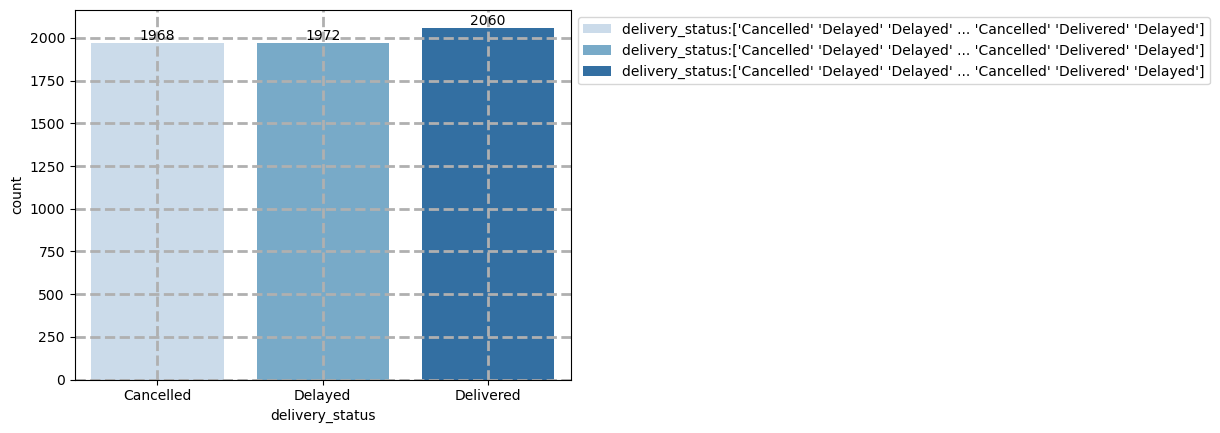

In [54]:
ax=sns.countplot(data=data,x='delivery_status',palette='Blues',hue=data['delivery_status'],label=f'delivery_status:{data.delivery_status.values}')
for i in ax.containers:
    ax.bar_label(i)
plt.grid(True,linestyle='--',linewidth=2)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [ ]:
HERE IN DILIVERED_STATUS DILIVERED ORDERS ARE HIGH.

In [55]:
#city_wise_dilvery =  data.groupby('city')['delivery_status'].value_counts()

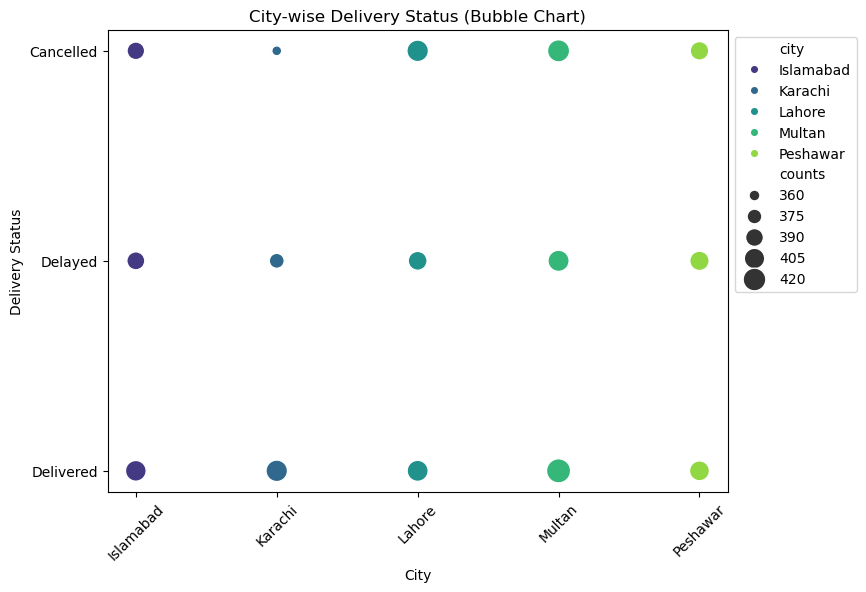

In [87]:
city_wise_delivery = data.groupby(['city','delivery_status']).size().reset_index(name='counts')

plt.figure(figsize=(8,6))
sns.scatterplot(data=city_wise_delivery, x='city', y='delivery_status', size='counts', hue='city', palette="viridis", legend=True, sizes=(50, 300))

plt.title("City-wise Delivery Status (Bubble Chart)")
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("City")
plt.ylabel("Delivery Status")
plt.xticks(rotation=45)
plt.show()

  delivery_status    rating
0       Cancelled  2.965447
1         Delayed  3.027890
2       Delivered  2.997087


D:\Anaconda\envs\pyfix\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


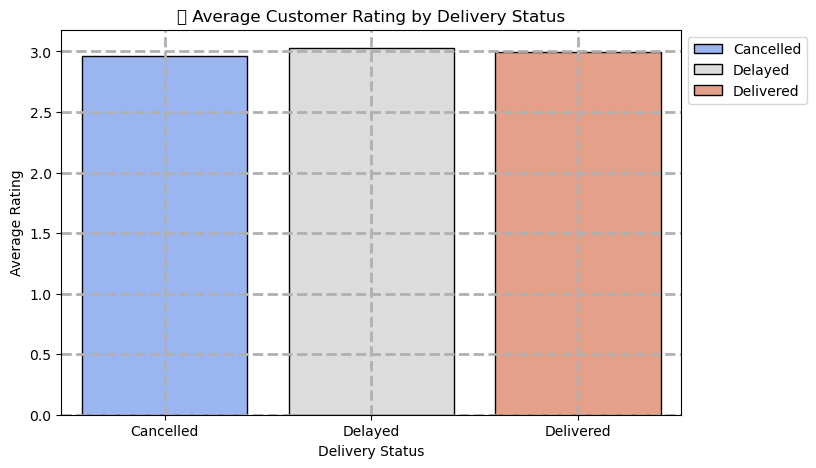

In [95]:
rating_by_delivery = data.groupby('delivery_status')['rating'].mean().reset_index()
print(rating_by_delivery)
plt.figure(figsize=(8,5))
sns.barplot(data=rating_by_delivery, x='delivery_status', y='rating', palette="coolwarm",hue='delivery_status',edgecolor='black',legend=True)
plt.legend(bbox_to_anchor=(1,1))
plt.grid(True,linestyle='--',linewidth=2)
plt.title("📊 Average Customer Rating by Delivery Status")
plt.xlabel("Delivery Status")
plt.ylabel("Average Rating")
plt.show()

# 5. Churn & Retention

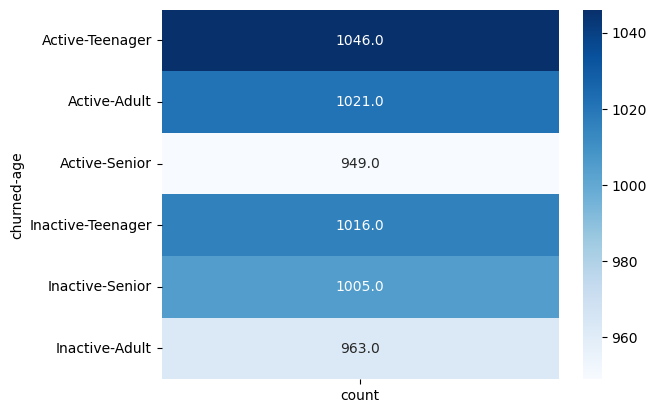

In [98]:
ch_age = data.groupby('churned')['age'].value_counts().to_frame()
sns.heatmap(ch_age,annot=True, cmap='Blues', fmt=".1f")
plt.show()

In [ ]:
MAX ACTIVE TEENAGER IS HIGH IN THE CHURNED_AGE.

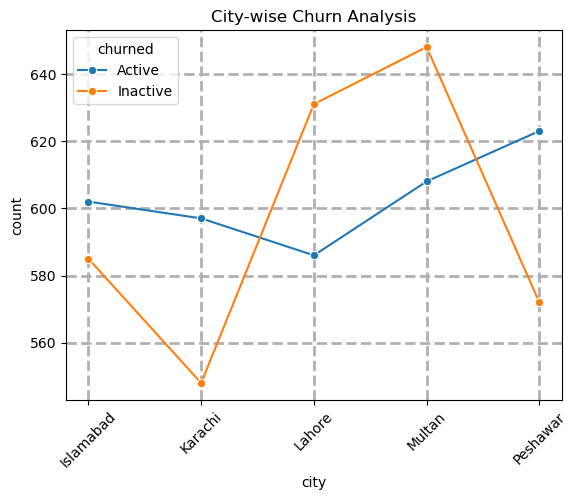

In [100]:
city_ch = data.groupby(['city', 'churned']).size().reset_index(name='count')

sns.lineplot(data=city_ch, x='city', y='count', hue='churned', marker='o')
plt.grid(True,linestyle='--',linewidth=2)
plt.title("City-wise Churn Analysis")
plt.xticks(rotation=45)
plt.show()

In [ ]:
MAX INACTIVE USER FROM MULTAN AND MAX ACTIVE USER PESHAWAR.

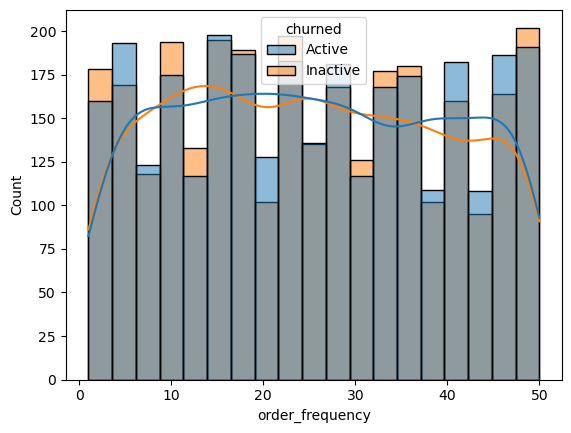

In [122]:
sns.histplot(data=data,x='order_frequency',hue='churned',kde=True,legend=True)
#plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [6]:
da = pd.read_excel('Asad.xlsx')
da.head(2)

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT


In [10]:
da.columns = ['EEID', 'FullName', 'JobTitle', 'Department', 'BusinessUnit',
       'Gender', 'Ethnicity', 'Age', 'HireDate', 'AnnualSalary', 'Bonus%',
       'Country', 'City', 'ExitDate']

In [12]:
da.columns

Index(['EEID', 'FullName', 'JobTitle', 'Department', 'BusinessUnit', 'Gender',
       'Ethnicity', 'Age', 'HireDate', 'AnnualSalary', 'Bonus%', 'Country',
       'City', 'ExitDate'],
      dtype='object')

In [16]:
d = da.to_csv('employe_data_sales.csv')